# Dynamic Time Warp

## Intro

It is very common to describe processes that occur in time as finite sequences of elements that represent them at a given instant. In several contexts it is possible that a given process can be represented by different sequences. Sometimes these sequences, although representing the same thing, have a different temporal evolution, and in several practical applications it is desirable to compare the temporal evolution of both and, eventually, to align them.

The DTW appears in this context as a technique to tackle the alignment problem. Using an algorithm that compares the distance between each element of the sequences, the DTW can generate a time curve that best aligns them.

The calculation of the DTW takes place in two stages:
1. Computation of the cost matrix
2. Evaluation of optimal path

Both steps are described below:

## Computation of the cost matrix

The first step is to create an array containing the cost of aligning each element of the two sequences. The final result of the DTW will be the path that goes from one corner to another of this matrix accumulating the lowest possible cost.

Given two sequences $s1$ and $s2$ with, respectively, $n$ and $m$ elements, the cost matrix will be of size $n \times m$. In order to compute the value of the matrix elements, different distance measures can be used, such as the euclidean or cosine. At first, with the distance function $d(a, b)$ defined, the DTW could be computed by calculating the cost matrix $C$

$$C_{i,j} = d(s1_i, s2_j)$$

and choosing the path that crosses this matrix accumulating the lowest cost. However, it would be necessary to calculate the cost of all paths that run through the matrix. Taking into account that the number of paths grows exponentially with the number of elements, it would be impracticable to implement this algorithm.

The solution to this problem is to define the cost matrix so as to represent the accumulated cost to each element instead of the individual cost of the element. Taking into account that it is desired to reduce the total cost of the path from $C_{1,1}$ to $Cm, n$ one can redefine the cost matrix as

$$C_{i,j} = d(s1_i, s2_j) + \min(C_{i-1,j}, C_{i-1,j-1}, C_{i,j-1})$$

so as to take into account in calculating each element the cost of the best path to it. Thus, the complete calculation of the DTW can be performed with complexity $\mathcal{O}(mn)$.

## Evaluation of optimal path

It follows from the definition chosen for the cost matrix that the cost of the best path is given by the matrix element $C_{m,n}$. To find out which path this is, simply walk towards the $C_{1,1}$ element by looking at the three elements $C_{i-1,j}, C_{i-1,j-1}, C_{i,j-1}$ adjacent and immediately preceding inserting the indices in the path. The procedure is as follows:
- The first element of the path is the pair $(m,n)$
- The next element to be inserted is defined by the neighborhood of the cost matrix around the point indexed by the current element $(i,j)$:
   - If the lowest cost element is $C_{i-1,j}$, insert $(i-1,j)$ in the path
   - If the lowest cost element is $C_{i-1,j-1}$, insert $(i-1,j-1)$ in the path
   - If the lowest cost element is $C_{i,j-1}$, insert $(i,j-1)$ in the path
- Repeat the previous step until the pair $(1,1)$ is inserted.

The result of this procedure is a vector of ordered pairs that indicate which elements are best aligned in each of the sequences.


## Application

In [1]:
using Plots
using DynamicTimeWarp

Be a process represented by two different sequences, one sampled at regular intervals and one not. The DTW can be used to find the relation between the points of the two sequences:

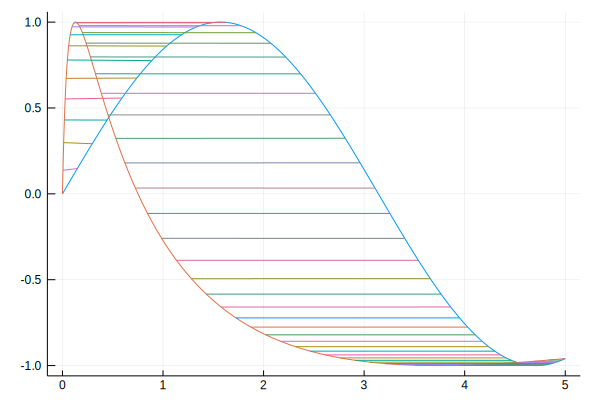

In [2]:
x = 0:0.001:5
s1 = sin.(x)'
s2 = sin.(log.(range(1;length=5001, stop=exp(5))))'
l, m = linkseq(s1', s2', 1000, 50)

p = plot(x, [s1[:] s2[:]])
plot!(p, l, m; legend=false, fmt = :svg)

In this case, since the two sequences represent the same process, the total cost of DTW would tend to be zero, since, if they were aligned, the sequences would overlap.

Note that at no time during the DTW formulation was specified the composition of the sequences. If the distance function is defined for it, it is possible to calculate the DTW between sequences of scalars, vectors or even tensors:

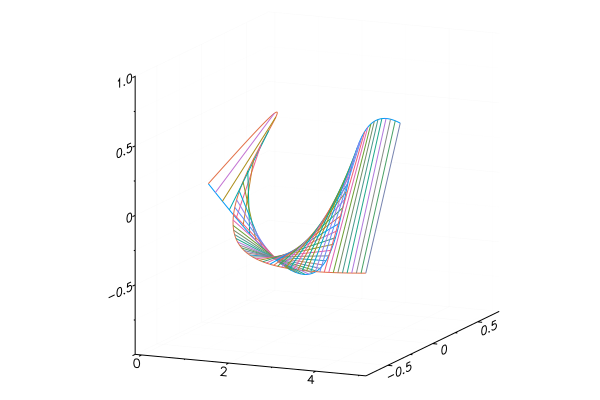

In [3]:
x = 0:0.001:5
s1 = [0.3; -0.7] * sin.(x)'
s2 = [0.7; 0.3] * sin.(log.(range(1;length=5001, stop=exp(5))))'
l, m = linkseq(s1, s2, 1000, 50)

p = plot(x, [s1[1,:] s2[1,:]], [s1[2,:] s2[2,:]])
plot!(p, l, m[1,:,:], m[2,:,:]; legend=false, fmt = :svg)

You can also use the DTW to look for the best alignment between two arbitrary sequences:

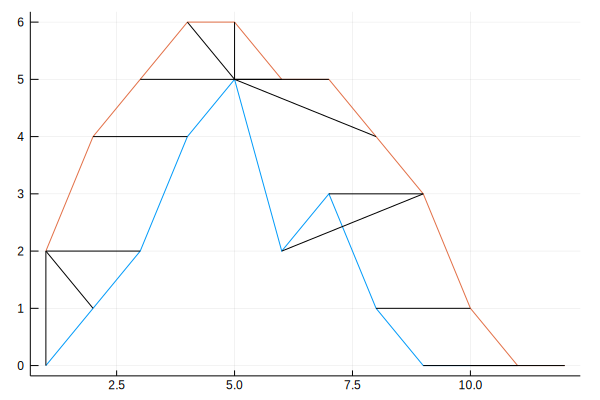

In [4]:
s1 = [0, 1, 2, 4, 5, 2, 3, 1, 0, 0]
s2 = [2, 4, 5, 6, 6, 5, 5, 4, 3, 1, 0, 0]
l, m = linkseq(s1, s2)
p = plot(s1)
plot!(p, s2)
plot!(p, l.+1, m; color=:black, legend=false, fmt = :svg)